# Clustering Model with KMeans

## Clustering customer by power consumption

In [44]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import pylab 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

dataset source: UCI Machine Learnin Repository
https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

In [12]:
# Loading Data
dataset = pd.read_csv('../dados/household_power_consumption.txt', delimiter=";", low_memory=False)

In [13]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [14]:
dataset.shape

(2075259, 9)

In [15]:
dataset.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

### Checking if exists null values

In [16]:
# Checking if exists null values
dataset.isnull().values.any()

True

In [18]:
# > 5% of missing values use imputation
# > 5% of missing values we can remove missing values

# Removing registers with missing value and first/second column
dataset = dataset.iloc[0:, 2:9].dropna()

In [19]:
dataset.shape

(2049280, 7)

In [20]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [21]:
# Checking if exists null values
dataset.isnull().values.any()

False

### Collecting 1% of total dataset

In [23]:
# Getting values of dataset
dataset_atrib = dataset.values
print(type(dataset_atrib))
dataset_atrib

<class 'numpy.ndarray'>


array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.938', '0.000', '239.820', ..., '0.000', '0.000', 0.0],
       ['0.934', '0.000', '239.700', ..., '0.000', '0.000', 0.0],
       ['0.932', '0.000', '239.550', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [25]:
# Colletcting a sample with 1% of total data
amostra1, amostra2 = train_test_split(dataset_atrib, train_size = 0.01)

In [26]:
amostra1.shape

(20492, 7)

### Find the best k value to dataset

In [36]:
# Applying dimension reduction with Principal Component Analysis
pca = PCA(n_components = 2).fit_transform(amostra1)
pca.shape

(20492, 2)

In [37]:
# Calculating the best value of k
k_range = range(1,12)

In [39]:
# Applying K-means algorithm to each value of k
k_means_var = [KMeans(n_clusters=k).fit(pca) for k in k_range]

In [41]:
print(k_means_var)

[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11)]


In [42]:
# Adjusting centroids to each model creted (with different k values)
centroids = [ W.cluster_centers_ for W in k_means_var]

In [43]:
print(centroids)

[array([[-3.35921457e-13, -2.40448600e-13]]), array([[11.9148622 , -2.39541748],
       [-6.34686975,  1.27600324]]), array([[-6.63802259,  0.67333159],
       [10.88438056, -4.87674247],
       [16.59532609, 24.30621121]]), array([[10.86646145, -4.90473508],
       [-6.65955891,  0.63003711],
       [ 5.53348905, 26.28756509],
       [23.0172378 , 21.95136608]]), array([[-6.66663226,  0.61599995],
       [10.8443683 , -4.94930052],
       [21.82410266, 19.23794496],
       [ 4.54924298, 24.15816464],
       [25.31495091, 41.02802021]]), array([[-6.67055078,  0.61598505],
       [14.69765461, -3.14694676],
       [ 4.48382541, 24.10559061],
       [25.30326695, 41.14061534],
       [22.0621042 , 19.971648  ],
       [10.0763376 , -5.24657433]]), array([[15.16971961, -2.97505866],
       [-6.70672596,  0.62375139],
       [25.30326695, 41.14061534],
       [22.08373772, 20.03787348],
       [ 4.48382541, 24.10559061],
       [ 3.59113323, -2.87664024],
       [10.58319835, -5.34050249]]

In [52]:
# Calculate Euclidean distance between each point from the centroids (the minimal distance)
k_euclid = [ cdist(pca, cent, 'euclidean') for cent in centroids ]
dist = [ np.min(ke, axis = 1) for ke in k_euclid ]

In [53]:
# Calculate sum of square distance inside the cluster
soma_quadrados_intra_cluster = [ sum(d**2) for d in dist ]
soma_quadrados_intra_cluster

[2588734.78587411,
 976419.228183074,
 263751.5397860758,
 189772.7139743169,
 153048.16422403557,
 130588.8301199747,
 112271.28417947343,
 95248.40026619015,
 76923.1681313766,
 63961.40551613335,
 50366.398524165015]

In [55]:
# Total sum square
soma_total = sum(pdist(pca)**2)/pca.shape[0]
soma_total

2588734.7858737633

In [56]:
# Calculate sum of square distance between clusters
soma_quadrado_inter_cluster = soma_total - soma_quadrados_intra_cluster
soma_quadrado_inter_cluster

array([-3.46917659e-07,  1.61231556e+06,  2.32498325e+06,  2.39896207e+06,
        2.43568662e+06,  2.45814596e+06,  2.47646350e+06,  2.49348639e+06,
        2.51181162e+06,  2.52477338e+06,  2.53836839e+06])

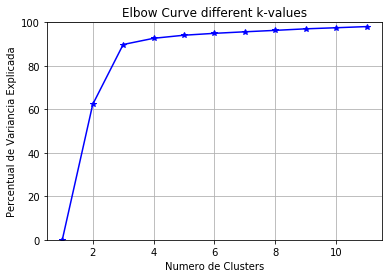

In [61]:
# Creating Elbow Curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrado_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Numero de Clusters')
plt.ylabel('Percentual de Variancia Explicada')
plt.title('Elbow Curve different k-values')
plt.show()

### Creating Model with k = 8

In [74]:
modelo_v1 = KMeans(n_clusters=8)
modelo_v1.fit(pca)

KMeans()

#### Creating Meshgrid

In [75]:
# Obtain min and max values and organize the shape
x_min, x_max = pca[:,0].min() - 5, pca[:,0].max() - 1
y_min, y_max = pca[:,1].min() - 1, pca[:,1].max() - 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

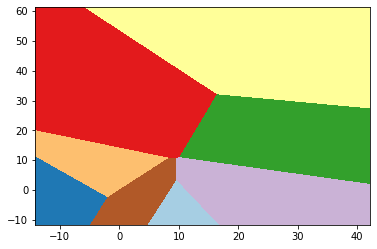

In [76]:
# Plotting
plt.figure(1)
plt.clf()
plt.imshow(Z,
          interpolation='nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower'
          )
plt.show()

#### Calculate Silhouette Score

In [69]:
?silhouette_score

In [77]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric='euclidean')

0.6647265118697016

### Creating Model with k = 10

In [79]:
modelo_v2 = KMeans(n_clusters=10)
modelo_v2.fit(pca)

KMeans(n_clusters=10)

#### Creating Meshgrid

In [83]:
# Obtain min and max values and organize the shape
x_min, x_max = pca[:,0].min() - 5, pca[:,0].max() - 1
y_min, y_max = pca[:,1].min() - 1, pca[:,1].max() - 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

Z = modelo_v2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

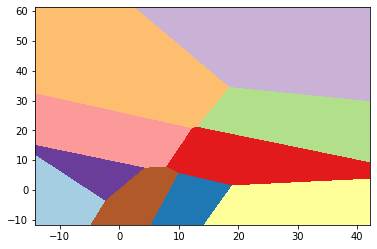

In [84]:
# Plotting
plt.figure(1)
plt.clf()
plt.imshow(Z,
          interpolation='nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower'
          )
plt.show()

#### Calculate Silhouette Score

In [85]:
# Silhouette Score
labels = modelo_v2.labels_
silhouette_score(pca, labels, metric='euclidean')

0.6457820399822991

### Calculate the average consumption per cluster

In [87]:
names = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

In [88]:
# Creating the dataframe
cluster_map = pd.DataFrame(amostra1, columns=names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_v1.labels_

In [89]:
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,2.070,0.162,241.510,8.600,0.000,0.000,18,0
1,1.968,0.000,239.960,8.200,0.000,0.000,28,5
2,0.430,0.102,242.700,2.000,0.000,0.000,0,1
3,1.702,0.100,241.680,7.000,0.000,0.000,0,4
4,0.940,0.000,242.050,4.000,0.000,0.000,1,1
...,...,...,...,...,...,...,...,...
20487,1.806,0.170,239.590,7.400,0.000,1.000,19,0
20488,0.314,0.286,245.220,1.600,0.000,1.000,0,1
20489,0.298,0.000,247.010,1.400,0.000,0.000,0,1
20490,0.382,0.214,239.300,1.800,0.000,0.000,1,1


In [91]:
# Calculate the average consumption
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    1.673677
1    0.383411
2    4.117346
3    3.022554
4    1.663555
5    3.066720
6    5.780189
7    1.110864
Name: Global_active_power, dtype: float64

In [92]:
cluster_map['Global_active_power'].mean()

1.0904592035916487